#  SAP bikes analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import dateutil
import seaborn as sns
from copy import deepcopy

# (EDA) Load and explor sales orders data

In [2]:
# Load the provided dataset with a specified encoding (e.g., 'ISO-8859-1' or 'utf-16')
Address = r"C:\Users\parul\Downloads\archive\Addresses.csv"
BusinessPartners = r"C:\Users\parul\Downloads\archive\BusinessPartners.csv"
Employees = r"C:\Users\parul\Downloads\archive\Employees.csv"
ProductCategories = r"C:\Users\parul\Downloads\archive\ProductCategories.csv"
ProductCategoryText = r"C:\Users\parul\Downloads\archive\ProductCategoryText.csv"
Products = r"C:\Users\parul\Downloads\archive\Products.csv"
ProductTexts = r"C:\Users\parul\Downloads\archive\ProductTexts.csv"
SalesOrderItems = r"C:\Users\parul\Downloads\archive\SalesOrderItems.csv"
SalesOrders = r"C:\Users\parul\Downloads\archive\SalesOrders.csv"

# Specify the encoding when reading the CSV files
df1 = pd.read_csv(Address, encoding='ISO-8859-1')  # Example encoding
df2 = pd.read_csv(BusinessPartners, encoding='ISO-8859-1')  # Example encoding
df3 = pd.read_csv(Employees, encoding='ISO-8859-1')  # Example encoding
df4 = pd.read_csv(ProductCategories, encoding='ISO-8859-1')  # Example encoding
df5 = pd.read_csv(ProductCategoryText, encoding='ISO-8859-1')  # Example encoding
df6 = pd.read_csv(Products, encoding='ISO-8859-1')  # Example encoding
df7 = pd.read_csv(ProductTexts, encoding='ISO-8859-1')  # Example encoding
df8 = pd.read_csv(SalesOrderItems, encoding='ISO-8859-1')  # Example encoding
df9 = pd.read_csv(SalesOrders, encoding='ISO-8859-1')  # Example encoding

In [3]:
# Merge dataframes on common columns without duplicating common columns
merged_df = df4.merge(df5, on=['PRODCATEGORYID'], how='outer') \
              .merge(df6, on=['PRODCATEGORYID'], how='outer') \
              .merge(df7, on=['PRODUCTID'], how='outer') \
              .merge(df8, on=['PRODUCTID'], how='outer') \
              .merge(df9, on=['SALESORDERID'], how='outer')

In [4]:
# Initial data exploration
merged_df.shape
print(merged_df.head())  # Display the first few rows of the dataset
print(merged_df.info())  # Get information about the dataset, including missing values

  PRODCATEGORYID  CREATEDBY_x  CREATEDAT_x LANGUAGE_x  SHORT_DESCR_x  \
0             RO           12     20181003         EN      Road Bike   
1             BX            4     20181003         EN            BMX   
2             MB           11     20181003         EN  Mountain Bike   
3             MB           11     20181003         EN  Mountain Bike   
4             RC            9     20181003         EN    Racing Bike   

   MEDIUM_DESCR_x  LONG_DESCR_x PRODUCTID TYPECODE  CREATEDBY_y  ...  \
0             NaN           NaN   RO-1001       PR            9  ...   
1             NaN           NaN   BX-1016       PR           11  ...   
2             NaN           NaN   MB-1031       PR           12  ...   
3             NaN           NaN   MB-1032       PR            2  ...   
4             NaN           NaN   RC-1054       PR           14  ...   

   NOTEID_y  PARTNERID  SALESORG  CURRENCY  GROSSAMOUNT_y NETAMOUNT_y  \
0       NaN  100000020       APJ       USD          99421   8

# Data Cleaning
Find the null values

In [5]:
# use isnull() to get the null values
null_values = merged_df.isnull().sum()
null_values

PRODCATEGORYID           0
CREATEDBY_x              0
CREATEDAT_x              0
LANGUAGE_x               0
SHORT_DESCR_x            0
MEDIUM_DESCR_x        2027
LONG_DESCR_x          2027
PRODUCTID                0
TYPECODE                 0
CREATEDBY_y              0
CREATEDAT_y              0
CHANGEDBY_x              0
CHANGEDAT_x              0
SUPPLIER_PARTNERID       0
TAXTARIFFCODE            0
QUANTITYUNIT_x           0
WEIGHTMEASURE            0
WEIGHTUNIT               0
CURRENCY_x               0
PRICE                    0
WIDTH                 2027
DEPTH                 2027
HEIGHT                2027
DIMENSIONUNIT         2027
PRODUCTPICURL         2027
LANGUAGE_y               0
SHORT_DESCR_y            0
MEDIUM_DESCR_y         358
LONG_DESCR_y          2027
SALESORDERID             0
SALESORDERITEM           0
NOTEID_x                 0
CURRENCY_y               0
GROSSAMOUNT_x            0
NETAMOUNT_x              0
TAXAMOUNT_x              0
ITEMATPSTATUS            0
O

In [6]:
# how many total missing values do we have?
total_cells = np.product(merged_df.shape)
total_missing = null_values.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100

print("Total cells in data set: " + str(total_cells),
      "Total of Null values: " +
      str(total_missing), "percent missing: " +
      str(percent_missing))


Total cells in data set: 115539 Total of Null values: 20628 percent missing: 17.853711733700308


In [7]:
#Drop ALL Null column 
merged_df = merged_df.drop(['MEDIUM_DESCR_x', 'LONG_DESCR_x', 'WIDTH', 'DEPTH', 'HEIGHT', 'DIMENSIONUNIT', 'PRODUCTPICURL', 'MEDIUM_DESCR_y', 'LONG_DESCR_y', 'OPITEMPOS', 'NOTEID_y'], axis = 1)


In [8]:
# double check if there is any null values after droping NOTEID col
print(merged_df.isnull().sum())

PRODCATEGORYID        0
CREATEDBY_x           0
CREATEDAT_x           0
LANGUAGE_x            0
SHORT_DESCR_x         0
PRODUCTID             0
TYPECODE              0
CREATEDBY_y           0
CREATEDAT_y           0
CHANGEDBY_x           0
CHANGEDAT_x           0
SUPPLIER_PARTNERID    0
TAXTARIFFCODE         0
QUANTITYUNIT_x        0
WEIGHTMEASURE         0
WEIGHTUNIT            0
CURRENCY_x            0
PRICE                 0
LANGUAGE_y            0
SHORT_DESCR_y         0
SALESORDERID          0
SALESORDERITEM        0
NOTEID_x              0
CURRENCY_y            0
GROSSAMOUNT_x         0
NETAMOUNT_x           0
TAXAMOUNT_x           0
ITEMATPSTATUS         0
QUANTITY              0
QUANTITYUNIT_y        0
DELIVERYDATE          0
CREATEDBY             0
CREATEDAT             0
CHANGEDBY_y           0
CHANGEDAT_y           0
FISCVARIANT           0
FISCALYEARPERIOD      0
PARTNERID             0
SALESORG              0
CURRENCY              0
GROSSAMOUNT_y         0
NETAMOUNT_y     

# Group sales records per sales Orgnization



In [9]:
# declear python function

def bar_plot(variable):
    """
        input: variable e.g. SALES ORG
        output: bar plot & value count
    """
    # get feature
    var = merged_df[variable]
    #count numer of categorical variable(value/sample)
    varValue = var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

Create Sales Org Category

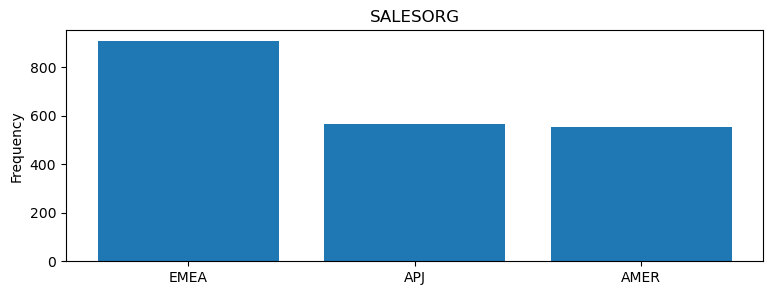

SALESORG: 
 EMEA    906
APJ     567
AMER    554
Name: SALESORG, dtype: int64


In [10]:
SALESORG_CATEGORY= ["SALESORG"]
for cat in SALESORG_CATEGORY:
    bar_plot(cat)

EMEA Sales Orgnization is having more sales transactions than other sales org.

# Sales Per Sales Org (Top Sales Org).

In [11]:
sorg_total_sales = merged_df.groupby('SALESORG')['NETAMOUNT_y'].sum()
print(sorg_total_sales)

SALESORG
AMER    3.686493e+07
APJ     3.823588e+07
EMEA    5.793547e+07
Name: NETAMOUNT_y, dtype: float64


**another way for dispaly .**

In [12]:
merged_df[['SALESORG','NETAMOUNT_y']].groupby('SALESORG').sum()

,NETAMOUNT_y
SALESORG,
AMER,3.686493e+07
APJ,3.823588e+07
EMEA,5.793547e+07


<AxesSubplot:title={'center':'Sales Total Per Sales Org.'}, xlabel='SALESORG'>

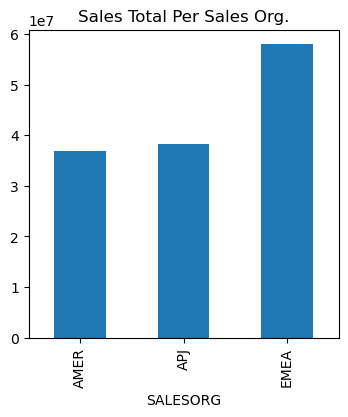

In [13]:
plt.figure(figsize=(4, 4)) # you can remove this line chart will be bigger 
plt.title('Sales Total Per Sales Org.')
sorg_total_sales.plot(kind='bar')

# Pie Chart

<AxesSubplot:ylabel='NETAMOUNT_y'>

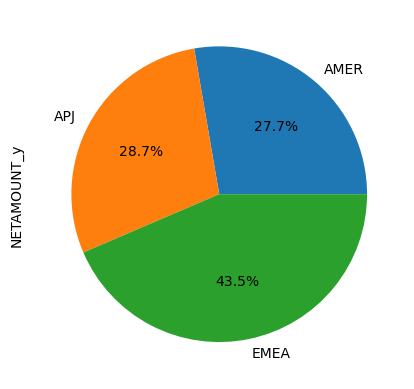

In [14]:
#sorg_total_sales.plot(kind='pie')
#sorg_total_sales.plot.pie()
sorg_total_sales.plot.pie(autopct='%1.1f%%')


43.5% of sales are coming from EMEA

**Sort data by TOP sales org | **TOP sales value****

In [15]:
sorg_total_sales = sorg_total_sales.reset_index()
sorg_total_sales.sort_values(by='NETAMOUNT_y', ascending=False)


,SALESORG,NETAMOUNT_y
2,EMEA,5.793547e+07
1,APJ,3.823588e+07
0,AMER,3.686493e+07


**Conclusion:** EMEA Sales Orgnization is the best sales org. (value + transactions)


# Sales Total Per Year (Best Year Sales).

In [16]:
year_total_sales = merged_df[['CREATEDAT','NETAMOUNT_y']].groupby('CREATEDAT').sum()

In [17]:
year_total_sales

,NETAMOUNT_y
CREATEDAT,
20180111,23777.250
20180112,55221.250
20180115,1170264.375
20180116,1048906.250
20180117,1065670.375
...,...
20190618,19278.000
20190619,555053.625
20190622,797097.000


In [18]:
#Remove index
year_total_sales_no_index = merged_df[['CREATEDAT','NETAMOUNT_y']]

In [19]:
year_total_sales_no_index

,CREATEDAT,NETAMOUNT_y
0,20180127,86993.375
1,20180127,86993.375
2,20180127,86993.375
3,20180127,86993.375
4,20180127,86993.375
...,...,...
2022,20190602,2520.000
2023,20180119,1223.250
2024,20180209,331.625
2025,20180428,7079.625


In [20]:
#Check column data type
for col in year_total_sales_no_index:
    print (type(year_total_sales_no_index[col][1]))

<class 'numpy.int64'>
<class 'numpy.float64'>


**Convert CREATEDAT values from integer to string**

In [21]:
# Convert integer to Python string
year_total_sales_no_index['CREATEDAT'] = year_total_sales_no_index.CREATEDAT.astype('str')

C:\Users\parul\AppData\Local\Temp\ipykernel_17248\2793580356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_total_sales_no_index['CREATEDAT'] = year_total_sales_no_index.CREATEDAT.astype('str')


**check if the CREATEDAT data type converted to string type**

In [22]:
for col in year_total_sales_no_index:
    print (type(year_total_sales_no_index[col][1]))

<class 'str'>
<class 'numpy.float64'>


In [23]:
# Substring Year from Date
for index_label, row_series in year_total_sales_no_index.iterrows():
    string = row_series['CREATEDAT']   
    year_total_sales_no_index.at[index_label , 'CREATEDAT'] = string[0:4]

In [24]:
year_total_sales_no_index

,CREATEDAT,NETAMOUNT_y
0,2018,86993.375
1,2018,86993.375
2,2018,86993.375
3,2018,86993.375
4,2018,86993.375
...,...,...
2022,2019,2520.000
2023,2018,1223.250
2024,2018,331.625
2025,2018,7079.625


# Draw Histogram for sales orders amount

<AxesSubplot:>

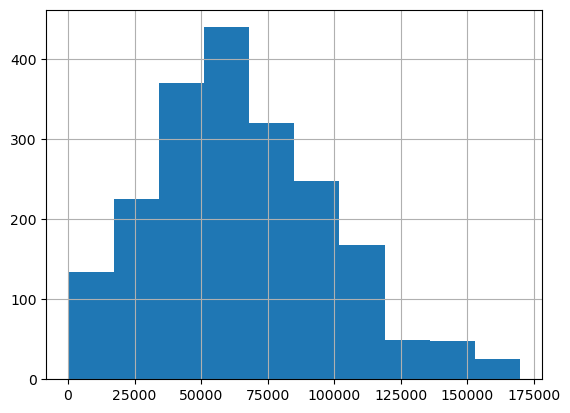

In [25]:
year_total_sales_no_index.NETAMOUNT_y.hist()


In [26]:
year_total_sales_no_index = year_total_sales_no_index[['CREATEDAT','NETAMOUNT_y']].groupby('CREATEDAT').sum()
year_total_sales_no_index

,NETAMOUNT_y
CREATEDAT,
2018,8.690174e+07
2019,4.613454e+07


In [27]:
# suppress scientific notation in Pandas 1.184117e+07 to show as 11841174.625
year_total_sales_no_index.apply(lambda x: '%.5f' % x, axis=1)



CREATEDAT
2018    86901744.12500
2019    46134538.62500
dtype: object

<AxesSubplot:title={'center':'Sales Total Per Year'}, xlabel='CREATEDAT'>

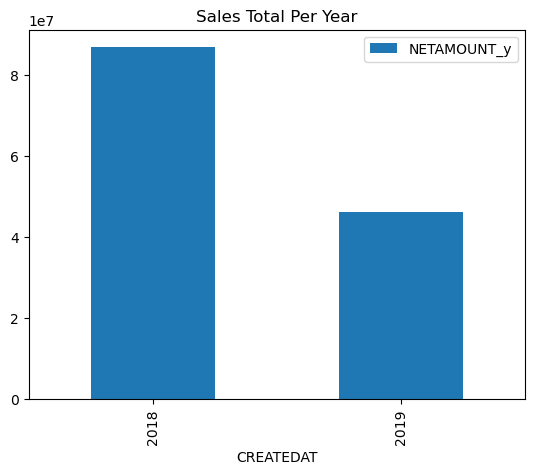

In [28]:
year_total_sales_no_index.plot(kind='bar', title="Sales Total Per Year")

array([<AxesSubplot:ylabel='NETAMOUNT_y'>], dtype=object)

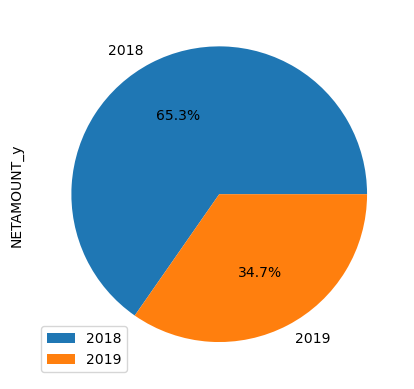

In [29]:
year_total_sales_no_index.plot.pie(autopct='%1.1f%%', subplots=True)

C:\Users\parul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


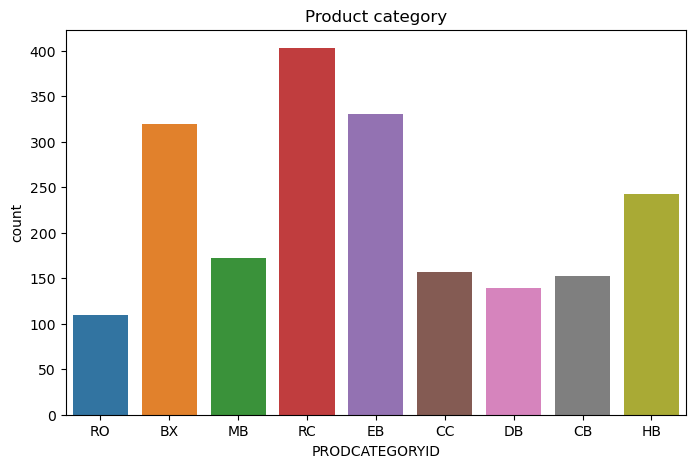

In [30]:
# Visualize the distribution of product category
plt.figure(figsize=(8, 5))
sns.countplot(merged_df['PRODCATEGORYID'])
plt.title('Product category')
plt.show()

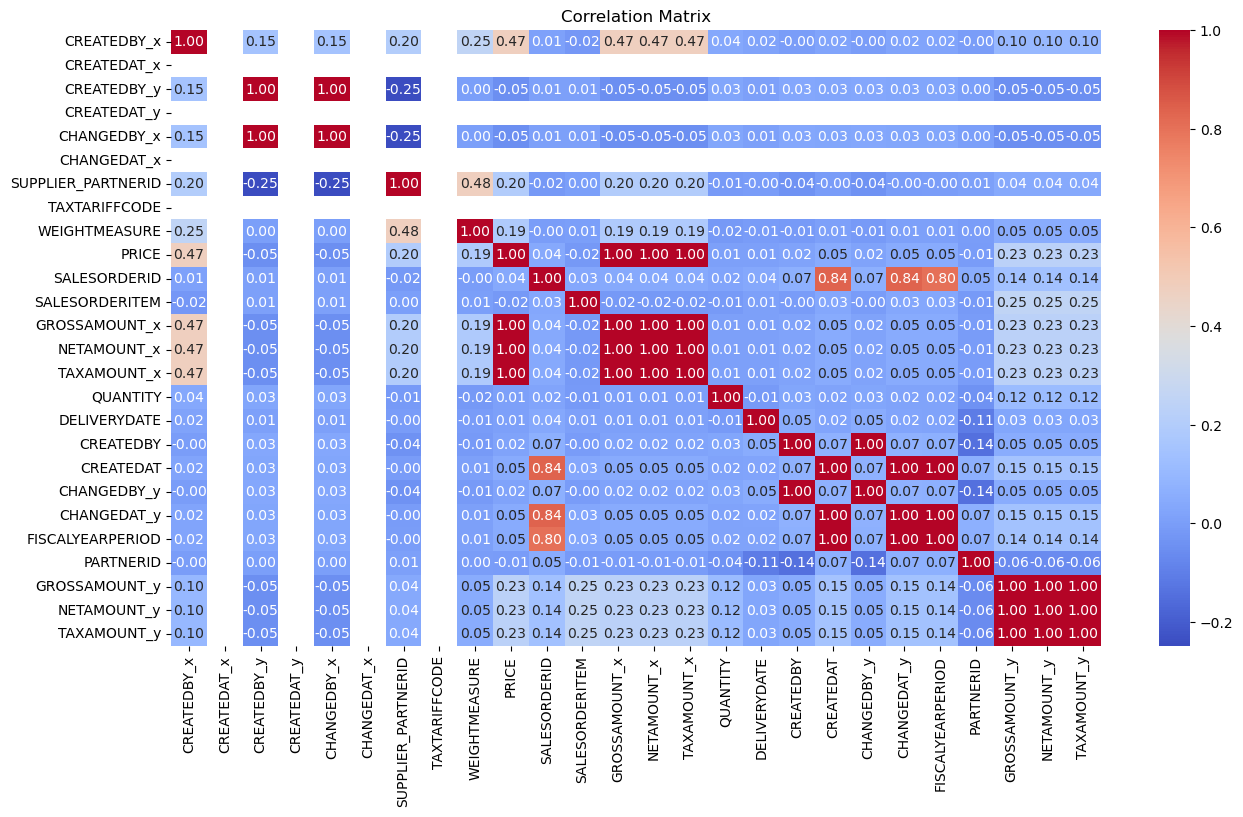

In [31]:
# Correlation matrix
correlation_matrix = merged_df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

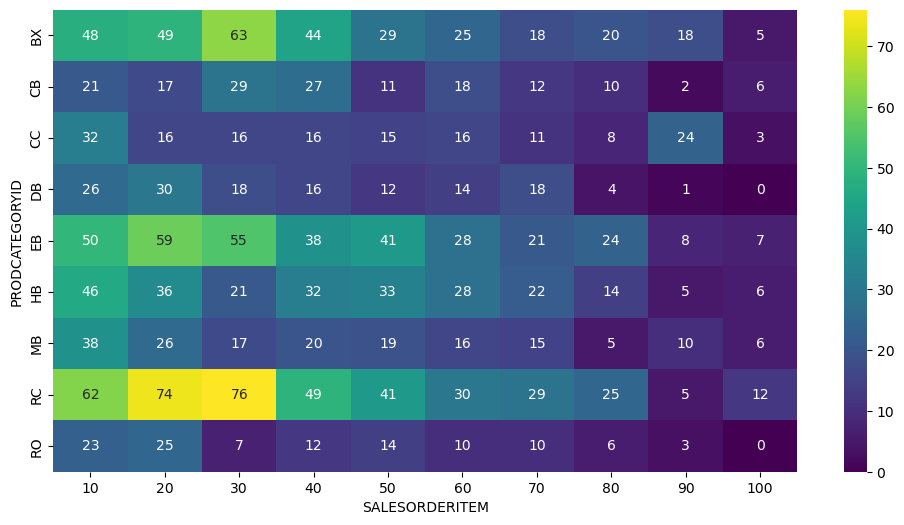

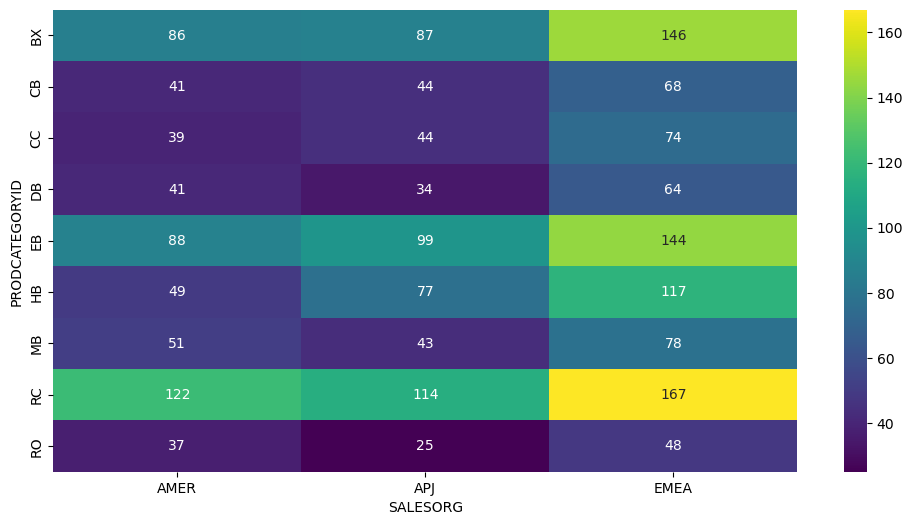

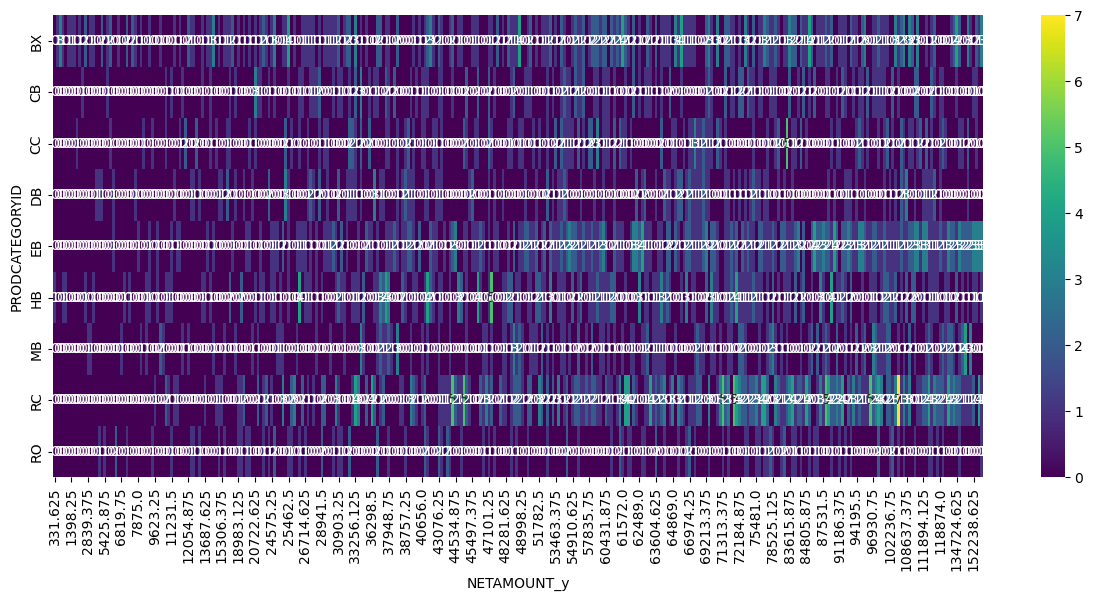

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
heatmap_data = merged_df.pivot_table(index='PRODCATEGORYID', columns='SALESORDERITEM', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')
heatmap_data = merged_df.pivot_table(index='PRODCATEGORYID', columns='SALESORDERITEM', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
heatmap_data = merged_df.pivot_table(index='PRODCATEGORYID', columns='SALESORG', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')
heatmap_data = merged_df.pivot_table(index='PRODCATEGORYID', columns='SALESORG', aggfunc='size', fill_value=0)

plt.figure(figsize=(15, 6))
heatmap_data = merged_df.pivot_table(index='PRODCATEGORYID', columns='NETAMOUNT_y', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')
heatmap_data = merged_df.pivot_table(index='PRODCATEGORYID', columns='NETAMOUNT_y', aggfunc='size', fill_value=0)

In [33]:
import pandas as pd

# Convert the 'CREATEDAT' column to datetime objects
merged_df['CREATEDAT'] = pd.to_datetime(merged_df['CREATEDAT'].astype(str), format='%Y-%m-%d')

# Now the 'CREATEDAT' column contains datetime objects
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 0 to 2026
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PRODCATEGORYID      2027 non-null   object        
 1   CREATEDBY_x         2027 non-null   int64         
 2   CREATEDAT_x         2027 non-null   int64         
 3   LANGUAGE_x          2027 non-null   object        
 4   SHORT_DESCR_x       2027 non-null   object        
 5   PRODUCTID           2027 non-null   object        
 6   TYPECODE            2027 non-null   object        
 7   CREATEDBY_y         2027 non-null   int64         
 8   CREATEDAT_y         2027 non-null   int64         
 9   CHANGEDBY_x         2027 non-null   int64         
 10  CHANGEDAT_x         2027 non-null   int64         
 11  SUPPLIER_PARTNERID  2027 non-null   int64         
 12  TAXTARIFFCODE       2027 non-null   int64         
 13  QUANTITYUNIT_x      2027 non-null   object      

In [34]:
df_tmp = merged_df.copy()

In [35]:
# Add datetime parameters for CREATEDAT
df_tmp["saleYear"] = df_tmp['CREATEDAT'].dt.year
df_tmp["saleMonth"] = df_tmp['CREATEDAT'].dt.month
df_tmp["saleDay"] = df_tmp['CREATEDAT'].dt.day

In [36]:
df_tmp.head().T

,0,1,2,3,4
PRODCATEGORYID,RO,BX,MB,MB,RC
CREATEDBY_x,12,4,11,11,9
CREATEDAT_x,20181003,20181003,20181003,20181003,20181003
LANGUAGE_x,EN,EN,EN,EN,EN
SHORT_DESCR_x,Road Bike,BMX,Mountain Bike,Mountain Bike,Racing Bike
PRODUCTID,RO-1001,BX-1016,MB-1031,MB-1032,RC-1054
TYPECODE,PR,PR,PR,PR,PR
CREATEDBY_y,9,11,12,2,14
CREATEDAT_y,20181003,20181003,20181003,20181003,20181003
CHANGEDBY_x,9,11,12,2,14


In [37]:
df_tmp.SALESORG.value_counts()

EMEA    906
APJ     567
AMER    554
Name: SALESORG, dtype: int64

## Modelling

In [38]:
# Check for missing categories and different datatypes
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 0 to 2026
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PRODCATEGORYID      2027 non-null   object        
 1   CREATEDBY_x         2027 non-null   int64         
 2   CREATEDAT_x         2027 non-null   int64         
 3   LANGUAGE_x          2027 non-null   object        
 4   SHORT_DESCR_x       2027 non-null   object        
 5   PRODUCTID           2027 non-null   object        
 6   TYPECODE            2027 non-null   object        
 7   CREATEDBY_y         2027 non-null   int64         
 8   CREATEDAT_y         2027 non-null   int64         
 9   CHANGEDBY_x         2027 non-null   int64         
 10  CHANGEDAT_x         2027 non-null   int64         
 11  SUPPLIER_PARTNERID  2027 non-null   int64         
 12  TAXTARIFFCODE       2027 non-null   int64         
 13  QUANTITYUNIT_x      2027 non-null   object      

In [39]:
# Check for missing values
df_tmp.isna().sum()

PRODCATEGORYID        0
CREATEDBY_x           0
CREATEDAT_x           0
LANGUAGE_x            0
SHORT_DESCR_x         0
PRODUCTID             0
TYPECODE              0
CREATEDBY_y           0
CREATEDAT_y           0
CHANGEDBY_x           0
CHANGEDAT_x           0
SUPPLIER_PARTNERID    0
TAXTARIFFCODE         0
QUANTITYUNIT_x        0
WEIGHTMEASURE         0
WEIGHTUNIT            0
CURRENCY_x            0
PRICE                 0
LANGUAGE_y            0
SHORT_DESCR_y         0
SALESORDERID          0
SALESORDERITEM        0
NOTEID_x              0
CURRENCY_y            0
GROSSAMOUNT_x         0
NETAMOUNT_x           0
TAXAMOUNT_x           0
ITEMATPSTATUS         0
QUANTITY              0
QUANTITYUNIT_y        0
DELIVERYDATE          0
CREATEDBY             0
CREATEDAT             0
CHANGEDBY_y           0
CHANGEDAT_y           0
FISCVARIANT           0
FISCALYEARPERIOD      0
PARTNERID             0
SALESORG              0
CURRENCY              0
GROSSAMOUNT_y         0
NETAMOUNT_y     

### Convert strings to categories

One way to help turn all the data into numbers is to convert the columns with the string datatype into a category datatype.

In [40]:
# These columns contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

PRODCATEGORYID
LANGUAGE_x
SHORT_DESCR_x
PRODUCTID
TYPECODE
QUANTITYUNIT_x
WEIGHTUNIT
CURRENCY_x
LANGUAGE_y
SHORT_DESCR_y
NOTEID_x
CURRENCY_y
ITEMATPSTATUS
QUANTITYUNIT_y
FISCVARIANT
SALESORG
CURRENCY
LIFECYCLESTATUS
BILLINGSTATUS
DELIVERYSTATUS


In [41]:
# This will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [42]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 0 to 2026
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   PRODCATEGORYID      2027 non-null   category      
 1   CREATEDBY_x         2027 non-null   int64         
 2   CREATEDAT_x         2027 non-null   int64         
 3   LANGUAGE_x          2027 non-null   category      
 4   SHORT_DESCR_x       2027 non-null   category      
 5   PRODUCTID           2027 non-null   category      
 6   TYPECODE            2027 non-null   category      
 7   CREATEDBY_y         2027 non-null   int64         
 8   CREATEDAT_y         2027 non-null   int64         
 9   CHANGEDBY_x         2027 non-null   int64         
 10  CHANGEDAT_x         2027 non-null   int64         
 11  SUPPLIER_PARTNERID  2027 non-null   int64         
 12  TAXTARIFFCODE       2027 non-null   int64         
 13  QUANTITYUNIT_x      2027 non-null   category    

In [43]:
# Save preprocessed data
df_tmp.to_csv("train_tmp.csv",
              index=False)

In [44]:
# Import preprocessed data
df_tmp = pd.read_csv("train_tmp.csv",
                     low_memory=False)
df_tmp.head().T

,0,1,2,3,4
PRODCATEGORYID,RO,BX,MB,MB,RC
CREATEDBY_x,12,4,11,11,9
CREATEDAT_x,20181003,20181003,20181003,20181003,20181003
LANGUAGE_x,EN,EN,EN,EN,EN
SHORT_DESCR_x,Road Bike,BMX,Mountain Bike,Mountain Bike,Racing Bike
PRODUCTID,RO-1001,BX-1016,MB-1031,MB-1032,RC-1054
TYPECODE,PR,PR,PR,PR,PR
CREATEDBY_y,9,11,12,2,14
CREATEDAT_y,20181003,20181003,20181003,20181003,20181003
CHANGEDBY_x,9,11,12,2,14


### Filling and turning categorical variables to numbers

Now I've filled the numeric values, I'll do the same with the categorical values.

In [45]:
# Turn categorical variables into numbers
for label, content in df_tmp.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_tmp[label] = pd.Categorical(content).codes+1   

In [46]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 70 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PRODCATEGORYID              2027 non-null   int8   
 1   CREATEDBY_x                 2027 non-null   int64  
 2   CREATEDAT_x                 2027 non-null   int64  
 3   LANGUAGE_x                  2027 non-null   int8   
 4   SHORT_DESCR_x               2027 non-null   int8   
 5   PRODUCTID                   2027 non-null   int8   
 6   TYPECODE                    2027 non-null   int8   
 7   CREATEDBY_y                 2027 non-null   int64  
 8   CREATEDAT_y                 2027 non-null   int64  
 9   CHANGEDBY_x                 2027 non-null   int64  
 10  CHANGEDAT_x                 2027 non-null   int64  
 11  SUPPLIER_PARTNERID          2027 non-null   int64  
 12  TAXTARIFFCODE               2027 non-null   int64  
 13  QUANTITYUNIT_x              2027 

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model
model = RandomForestRegressor(n_jobs=-1)

# Fit the model
model.fit(df_tmp.drop("NETAMOUNT_y", axis=1), df_tmp.NETAMOUNT_y)

RandomForestRegressor(n_jobs=-1)

In [48]:
# Score the model
model.score(df_tmp.drop("NETAMOUNT_y", axis=1), df_tmp.NETAMOUNT_y)

0.9999997318337108

### Splitting data into train/test sets

Randomly splitting the data into train and test sets using something like `train_test_split()` wouldn't work since it is a time series problem.

Instead, I will split the data into training and test sets using the date each sample occured.

In this case:
* Training = all samples up until 2018
* Test = all samples from Jan 1, 2019 - June 30, 2019

In [49]:
df_tmp.saleYear.value_counts()

2018    1394
2019     633
Name: saleYear, dtype: int64

In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [51]:
# Split the data into training (2018) and testing (2019) sets
train_data = df_tmp[df_tmp['saleYear'] == 2018]
test_data = df_tmp[df_tmp['saleYear'] == 2019]

### Define features and traget variables

In [52]:
# Define your features (X) and target variable (y)
X_train = train_data.drop(columns=['NETAMOUNT_y'])
y_train = train_data['NETAMOUNT_y']
X_test = test_data.drop(columns=['NETAMOUNT_y'])
y_test = test_data['NETAMOUNT_y']

### Creating an evaluation function

In [53]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate the model
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_test, test_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Test RMSLE": rmsle(y_test, test_preds),
              "Training R^2": model.score(X_train, y_train),
              "Test R^2": model.score(X_test, y_test)}
    return scores

### Train the model

In [54]:
# Initialize and train a RandomForest Regressor model
from sklearn.metrics import r2_score

# Train the RandomForest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

show_scores(model)

{'Training MAE': 7.9593364418936945,
 'Test MAE': 851.8659952606629,
 'Training RMSLE': 0.018761265852855827,
 'Test RMSLE': 0.021689395622217993,
 'Training R^2': 0.999999237704402,
 'Test R^2': 0.997797756846329}

### Hyperparameter tuning

In [55]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20}


In [56]:
show_scores(random_search)

{'Training MAE': 60.95358544687598,
 'Test MAE': 898.1363526051254,
 'Training RMSLE': 0.03549709819711216,
 'Test RMSLE': 0.021103640435036743,
 'Training R^2': 0.9999649834228859,
 'Test R^2': 0.9975168552154609}

### Train the model with the best hyperparameters

In [57]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=100,
                                    min_samples_leaf=4,
                                    min_samples_split=5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    max_depth=20)
ideal_model.fit(X_train, y_train)

Wall time: 229 ms


RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=5,
                      n_jobs=-1)

In [58]:
show_scores(ideal_model)

{'Training MAE': 63.58907433881913,
 'Test MAE': 887.7984343443452,
 'Training RMSLE': 0.03534511586297753,
 'Test RMSLE': 0.021088998655296842,
 'Training R^2': 0.9999656235309582,
 'Test R^2': 0.9976071850665152}

### Make predictions on unseen data 

In [59]:
import joblib  # For saving the trained model

In [60]:
# Save the trained model for future use
joblib.dump(ideal_model, 'rf_model.pkl')

['rf_model.pkl']

In [61]:
# Now, we can use the trained model to make predictions on new unseen data
# Load the model
loaded_model = joblib.load('rf_model.pkl')

In [66]:
# Prepare new unseen data as a DataFrame

# Now, let's make predictions for new data based on saleMonth and SALESORG
new_data = pd.DataFrame({
    'saleMonth': [8],  # Replace with the desired saleMonth for prediction
    'SALESORG': ['Your_SALESORG'],  # Replace with the desired SALESORG for prediction
    # Include other features as needed, with appropriate values
})

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder for SALESORG
label_encoder = LabelEncoder()

# Encode the SALESORG column
new_data['SALESORG'] = label_encoder.fit_transform(new_data['SALESORG']).astype('int8')

# Extract 'SALESORG' and 'saleMonth' columns from new_data
X_pred = new_data[['SALESORG', 'saleMonth']]

# Make predictions on the new data
predictions = loaded_model.predict(X_pred)

# The 'predictions' variable now contains the predicted 'NETAMOUNT_y' values for the new data.
print(predictions)

C:\Users\parul\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- BILLINGSTATUS
- BILLINGSTATUS_is_missing
- CHANGEDAT_x
- CHANGEDAT_y
- CHANGEDBY_x
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 2 features, but RandomForestRegressor is expecting 69 features as input.